In [1]:
import pandas as pd



In [2]:
trips = pd.read_csv("Seattle_cycles_trip.csv")
stations = pd.read_csv("Seattle_cycles_station.csv")
weather = pd.read_csv("Seattle_weather_daily.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_8392\3025706063.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("Seattle_cycles_trip.csv")


In [3]:
stations = pd.read_csv("Seattle_cycles_station.csv")
weather = pd.read_csv("Seattle_weather_daily.csv")

In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286858 non-null  object 
 10  gender             181558 non-null  object 
 11  birthyear          181554 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.3+ MB


In [5]:
trips['starttime'] = pd.to_datetime(trips['starttime'])

In [6]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   stoptime           286858 non-null  object        
 3   bikeid             286858 non-null  object        
 4   tripduration       286858 non-null  float64       
 5   from_station_name  286858 non-null  object        
 6   to_station_name    286858 non-null  object        
 7   from_station_id    286858 non-null  object        
 8   to_station_id      286858 non-null  object        
 9   usertype           286858 non-null  object        
 10  gender             181558 non-null  object        
 11  birthyear          181554 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 26.3+ MB


In [7]:
trips.drop(['stoptime', 'bikeid', 'tripduration', 'to_station_name', 'to_station_id', 'usertype', 'gender', 'birthyear'], axis=1, inplace=True)

In [8]:
trips['date']=trips['starttime'].dt.date

In [9]:
trips.head()

,trip_id,starttime,from_station_name,from_station_id,date
0,431,2014-10-13 10:31:00,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2014-10-13 10:32:00,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2014-10-13 10:33:00,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2014-10-13 10:34:00,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2014-10-13 10:34:00,2nd Ave & Spring St,CBD-06,2014-10-13


In [10]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   from_station_name  286858 non-null  object        
 3   from_station_id    286858 non-null  object        
 4   date               286858 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.9+ MB


In [11]:
trips['date'] = pd.to_datetime(trips['date'])

In [12]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   from_station_name  286858 non-null  object        
 3   from_station_id    286858 non-null  object        
 4   date               286858 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 10.9+ MB


In [13]:
trips.drop(['starttime'], axis=1, inplace=True)

In [14]:
trips.head()

,trip_id,from_station_name,from_station_id,date
0,431,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2nd Ave & Spring St,CBD-06,2014-10-13


In [15]:
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [16]:
stations.decommission_date.unique()

array([nan, '8/9/2016', '3/18/2016', '7/2/2016', '10/29/2015'],
      dtype=object)

In [17]:
active_stations=stations[stations['decommission_date'].isnull()]

In [18]:
active_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         54 non-null     object 
 1   name               54 non-null     object 
 2   lat                54 non-null     float64
 3   long               54 non-null     float64
 4   install_date       54 non-null     object 
 5   install_dockcount  54 non-null     int64  
 6   modification_date  13 non-null     object 
 7   current_dockcount  54 non-null     int64  
 8   decommission_date  0 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [19]:
active_stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [20]:
active_stations.drop(['lat', 'long', 'install_date', 'install_dockcount', 'modification_date', 'current_dockcount', 'decommission_date'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8392\2501451880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_stations.drop(['lat', 'long', 'install_date', 'install_dockcount', 'modification_date', 'current_dockcount', 'decommission_date'], axis=1, inplace=True)


In [21]:
active_stations.head()

,station_id,name
0,BT-01,3rd Ave & Broad St
1,BT-03,2nd Ave & Vine St
2,BT-04,6th Ave & Blanchard St
3,BT-05,2nd Ave & Blanchard St
4,CBD-03,7th Ave & Union St


In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        689 non-null    object 
 1   Max_Temperature_F           689 non-null    int64  
 2   Mean_Temperature_F          688 non-null    float64
 3   Min_TemperatureF            689 non-null    int64  
 4   Max_Dew_Point_F             689 non-null    int64  
 5   MeanDew_Point_F             689 non-null    int64  
 6   Min_Dewpoint_F              689 non-null    int64  
 7   Max_Humidity                689 non-null    int64  
 8   Mean_Humidity               689 non-null    int64  
 9   Min_Humidity                689 non-null    int64  
 10  Max_Sea_Level_Pressure_In   689 non-null    float64
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64
 12  Min_Sea_Level_Pressure_In   689 non-null    float64
 13  Max_Visibility_Miles        689 non

In [23]:
weather.Min_Visibility_Miles.unique()

array([ 4,  3, 10,  6,  2,  5,  8,  9,  7,  0,  1], dtype=int64)

In [24]:
weather.drop(['Max_Temperature_F','Min_TemperatureF','Max_Dew_Point_F','MeanDew_Point_F','Min_Dewpoint_F','Max_Humidity','Mean_Humidity','Min_Humidity','Max_Sea_Level_Pressure_In','Mean_Sea_Level_Pressure_In','Min_Sea_Level_Pressure_In','Max_Visibility_Miles','Mean_Visibility_Miles','Min_Visibility_Miles','Min_Visibility_Miles','Max_Wind_Speed_MPH','Max_Gust_Speed_MPH'], axis=1, inplace=True)

In [25]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 689 non-null    object 
 1   Mean_Temperature_F   688 non-null    float64
 2   Mean_Wind_Speed_MPH  689 non-null    int64  
 3   Precipitation_In     689 non-null    float64
 4   Events               328 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 27.0+ KB


In [26]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [27]:
weather.drop(['date'], axis=1, inplace=True)

KeyError: "['date'] not found in axis"

In [28]:
weather.head()

,Date,Mean_Temperature_F,Mean_Wind_Speed_MPH,Precipitation_In,Events
0,2014-10-13,62.0,4,0.00,Rain
1,2014-10-14,59.0,5,0.11,Rain
2,2014-10-15,58.0,7,0.45,Rain
3,2014-10-16,61.0,4,0.00,Rain
4,2014-10-17,60.0,3,0.14,Rain


In [29]:
weather.columns=weather.columns.str.lower()

In [30]:
trips.columns=trips.columns.str.lower()

In [31]:
trips.head()

,trip_id,from_station_name,from_station_id,date
0,431,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2nd Ave & Spring St,CBD-06,2014-10-13


In [32]:
trips=trips.rename(columns={'from_station_id':'station_id'})

In [33]:
trips

,trip_id,from_station_name,station_id,date
0,431,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2nd Ave & Spring St,CBD-06,2014-10-13
...,...,...,...,...
286853,255241,Harvard Ave & E Pine St,CH-09,2016-08-31
286854,255242,Cal Anderson Park / 11th Ave & Pine St,CH-08,2016-08-31
286855,255243,Cal Anderson Park / 11th Ave & Pine St,CH-08,2016-08-31
286856,255244,Cal Anderson Park / 11th Ave & Pine St,CH-08,2016-08-31


In [34]:
weather

,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,events
0,2014-10-13,62.0,4,0.00,Rain
1,2014-10-14,59.0,5,0.11,Rain
2,2014-10-15,58.0,7,0.45,Rain
3,2014-10-16,61.0,4,0.00,Rain
4,2014-10-17,60.0,3,0.14,Rain
...,...,...,...,...,...
684,2016-08-27,66.0,9,0.00,NaN
685,2016-08-28,68.0,9,0.00,NaN
686,2016-08-29,68.0,4,0.00,NaN
687,2016-08-30,64.0,9,0.00,NaN


In [35]:
active_stations.head()

,station_id,name
0,BT-01,3rd Ave & Broad St
1,BT-03,2nd Ave & Vine St
2,BT-04,6th Ave & Blanchard St
3,BT-05,2nd Ave & Blanchard St
4,CBD-03,7th Ave & Union St


In [36]:
# active_stations['name']=active_stations['name']+' (active)' ## This was previously run in error to add the word active
# to the value.  Code now required to revert to the original

In [37]:
active_stations['name']=active_stations['name'].str.replace('(active) (active)', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8392\2212363701.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  active_stations['name']=active_stations['name'].str.replace('(active) (active)', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_8392\2212363701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_stations['name']=active_stations['name'].str.replace('(active) (active)', '')


In [38]:
active_stations.head()

,station_id,name
0,BT-01,3rd Ave & Broad St
1,BT-03,2nd Ave & Vine St
2,BT-04,6th Ave & Blanchard St
3,BT-05,2nd Ave & Blanchard St
4,CBD-03,7th Ave & Union St


In [59]:
active_stations.head(10)

,station_id,name
0,BT-01,3rd Ave & Broad St
1,BT-03,2nd Ave & Vine St
2,BT-04,6th Ave & Blanchard St
3,BT-05,2nd Ave & Blanchard St
4,CBD-03,7th Ave & Union St
5,CBD-04,Union St & 4th Ave
6,CBD-05,1st Ave & Marion St
7,CBD-06,2nd Ave & Spring St
8,CBD-07,City Hall / 4th Ave & James St
9,CBD-13,2nd Ave & Pine St


In [40]:
trips.head()

,trip_id,from_station_name,station_id,date
0,431,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2nd Ave & Spring St,CBD-06,2014-10-13


In [41]:
trip_counts=trips.groupby(['date', 'from_station_name']).size().reset_index(name='trip_count')

In [42]:
trip_counts

,date,from_station_name,trip_count
0,2014-10-13,12th Ave & E Denny Way,12
1,2014-10-13,12th Ave & E Mercer St,10
2,2014-10-13,12th Ave & NE Campus Pkwy,12
3,2014-10-13,15th Ave E & E Thomas St,22
4,2014-10-13,15th Ave NE & NE 40th St,6
...,...,...,...
32746,2016-08-31,Summit Ave E & E Republican St,11
32747,2016-08-31,Terry Ave & Stewart St,5
32748,2016-08-31,Thomas St & 5th Ave N,5
32749,2016-08-31,Union St & 4th Ave,5


In [43]:
trip_counts = trip_counts.rename(columns={'station_name':'name'})

In [44]:
trip_counts

,date,from_station_name,trip_count
0,2014-10-13,12th Ave & E Denny Way,12
1,2014-10-13,12th Ave & E Mercer St,10
2,2014-10-13,12th Ave & NE Campus Pkwy,12
3,2014-10-13,15th Ave E & E Thomas St,22
4,2014-10-13,15th Ave NE & NE 40th St,6
...,...,...,...
32746,2016-08-31,Summit Ave E & E Republican St,11
32747,2016-08-31,Terry Ave & Stewart St,5
32748,2016-08-31,Thomas St & 5th Ave N,5
32749,2016-08-31,Union St & 4th Ave,5


In [45]:
import matplotlib.pyplot as plt

<Axes: xlabel='date'>

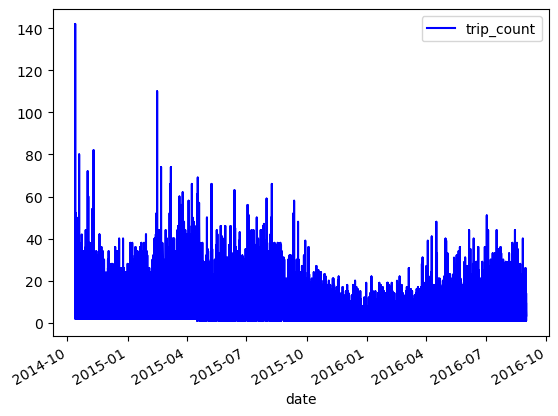

In [46]:
trip_counts.plot.line(x='date', y='trip_count', linestyle='-', color='blue')

In [47]:
import seaborn as sns

In [48]:
trip_counts = pd.get_dummies(trip_counts, columns=['name'])

KeyError: "None of [Index(['name'], dtype='object')] are in the [columns]"

In [49]:
trip_counts.head()

,date,from_station_name,trip_count
0,2014-10-13,12th Ave & E Denny Way,12
1,2014-10-13,12th Ave & E Mercer St,10
2,2014-10-13,12th Ave & NE Campus Pkwy,12
3,2014-10-13,15th Ave E & E Thomas St,22
4,2014-10-13,15th Ave NE & NE 40th St,6


In [53]:
trip_counts = trip_counts.rename(columns={'from_station_name':'name'})

In [54]:
trip_counts.head()

,date,name,trip_count
0,2014-10-13,12th Ave & E Denny Way,12
1,2014-10-13,12th Ave & E Mercer St,10
2,2014-10-13,12th Ave & NE Campus Pkwy,12
3,2014-10-13,15th Ave E & E Thomas St,22
4,2014-10-13,15th Ave NE & NE 40th St,6


In [ ]:
trip_counts.trip_count.unique()

In [55]:
trip_counts.to_csv("trip_counts.csv")

In [56]:
weather.to_csv("weather.csv")

In [60]:
active_stations.to_csv("active_stations.csv")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
trip_counts.columns

In [ ]:
cols=['date',
      'trip_count', 
       'name_12th Ave & E Denny Way',
       'name_12th Ave & E Mercer St', 'name_12th Ave & E Yesler Way',
       'name_12th Ave & NE Campus Pkwy', 'name_15th Ave E & E Thomas St',
       'name_15th Ave NE & NE 40th St', 'name_1st Ave & Marion St',
       'name_2nd Ave & Blanchard St', 'name_2nd Ave & Pine St',
       'name_2nd Ave & Spring St', 'name_2nd Ave & Vine St',
       'name_3rd Ave & Broad St', 'name_6th Ave & Blanchard St',
       'name_6th Ave S & S King St', 'name_7th Ave & Union St',
       'name_8D OPS 02', 'name_9th Ave N & Mercer St',
       'name_Bellevue Ave & E Pine St', 'name_Broadway and E Denny Way',
       'name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'name_Cal Anderson Park / 11th Ave & Pine St',
       'name_Childrens Hospital / Sandpoint Way NE & 40th Ave NE',
       'name_City Hall / 4th Ave & James St', 'name_Dexter Ave & Denny Way',
       'name_Dexter Ave N & Aloha St', 'name_E Blaine St & Fairview Ave E',
       'name_E Harrison St & Broadway Ave E', 'name_E Pine St & 16th Ave',
       'name_Eastlake Ave E & E Allison St',
       'name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St',
       'name_Frye Art Museum / Terry Ave & Columbia St',
       'name_Harvard Ave & E Pine St',
       'name_Key Arena / 1st Ave N & Harrison St',
       'name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St',
       'name_Lake Union Park / Valley St & Boren Ave N',
       'name_Mercer St & 9th Ave N', 'name_NE 42nd St & University Way NE',
       'name_NE 47th St & 12th Ave NE', 'name_NE Pacific St/UW Medical Center',
       'name_Occidental Park / Occidental Ave S & S Washington St',
       'name_PATH / 9th Ave & Westlake Ave',
       'name_Pier 66 / Alaskan Way & Bell St',
       'name_Pier 69 / Alaskan Way & Clay St', 'name_Pine St & 9th Ave',
       'name_Pronto shop', 'name_Pronto shop 2',
       'name_REI / Yale Ave N & John St',
       'name_Republican St & Westlake Ave N',
       'name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail',
       'name_Seattle University / E Columbia St & 12th Ave',
       'name_Summit Ave & E Denny Way', 'name_Summit Ave E & E Republican St',
       'name_Terry Ave & Stewart St', 'name_Thomas St & 5th Ave N',
       'name_UW Engineering Library / E Stevens Way NE & Jefferson Rd',
       'name_UW Intramural Activities Building',
       'name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd',
       'name_UW McCarty Hall / Whitman Ct', 'name_Union St & 4th Ave',
       'name_Westlake Ave & 6th Ave']